# Analysis of HDFC Stock
### Week 2

### Section 0


In [1]:
THEME = "Light" # Choose between 'Light'|'Dark'

In [2]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
# Import week2.csv
df = pd.read_csv('week2.csv')

In [3]:
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Day_Perc_Change,Trend
0,0,HDFC,EQ,2017-05-15,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,0.000000,Slight or no change
1,2,HDFC,EQ,2017-05-16,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,0.452068,Slight or no change
2,3,HDFC,EQ,2017-05-17,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,-0.896875,Slight negative
3,5,HDFC,EQ,2017-05-18,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,-0.995169,Slight negative
4,7,HDFC,EQ,2017-05-19,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,-1.070232,Negative


### Section 1
Convert Date column to correct datatype and plot

In [4]:
df['Date'] = df['Date'].astype('datetime64')

In [5]:
df = df.set_index(df['Date']).drop('Date', axis = 1)

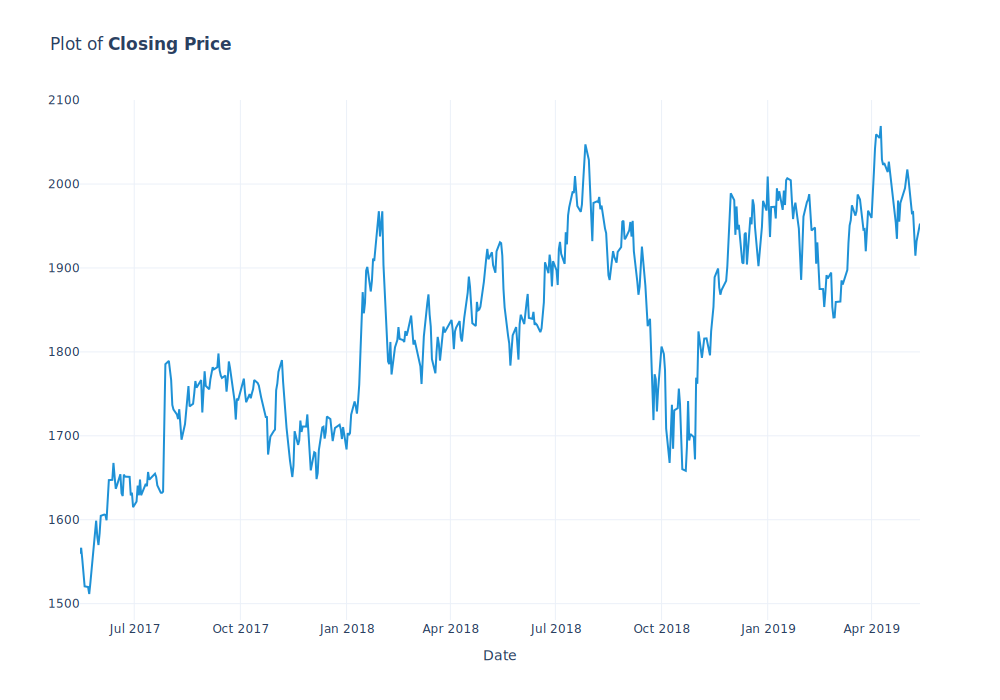

In [6]:
trace_close = dict(x = df.index, 
                   y = df['Close Price'], 
                   mode = "lines", 
                   name = 'Closing Price', 
                   marker = dict(color = "#1e91d6"))
layout = dict(title = 'Plot of <b>Closing Price</b>', 
              xaxis_title = 'Date', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = go.Scatter(trace_close),
                layout = layout)
fig.show('svg', width = 1000, height = 700)

### Section 2
Stem Plot

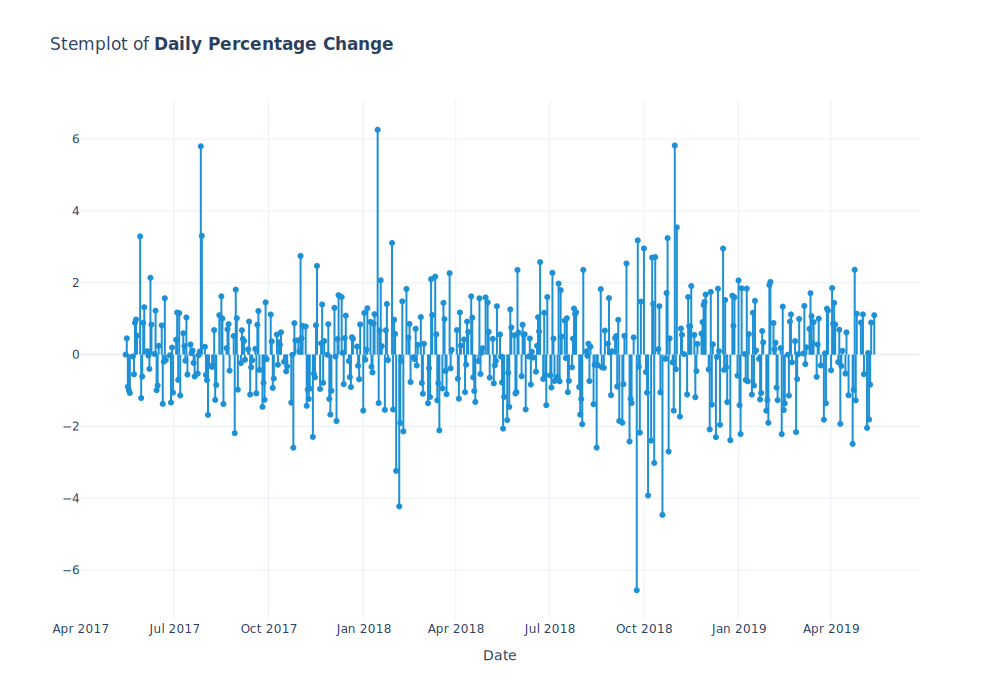

In [7]:
trace_daily_change = dict(x = df.index, 
                   y = df['Day_Perc_Change'], 
                   mode = "markers", 
                   name = 'Daily Percentage Change', 
                   marker = dict(color = "#1e91d6"), 
                   error_y = dict(type = "data",
                                  symmetric = False,
                                  arrayminus = df['Day_Perc_Change'],
                                  array = [0] * df['Day_Perc_Change'],
                                  width = 0))
layout = dict(title = 'Stemplot of <b>Daily Percentage Change</b>', 
              xaxis_title = 'Date', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = go.Scatter(trace_daily_change),
                layout = layout)
fig.show('svg', width = 1000, height = 700)

### Section 3
Volume and Daily Percentage Change 

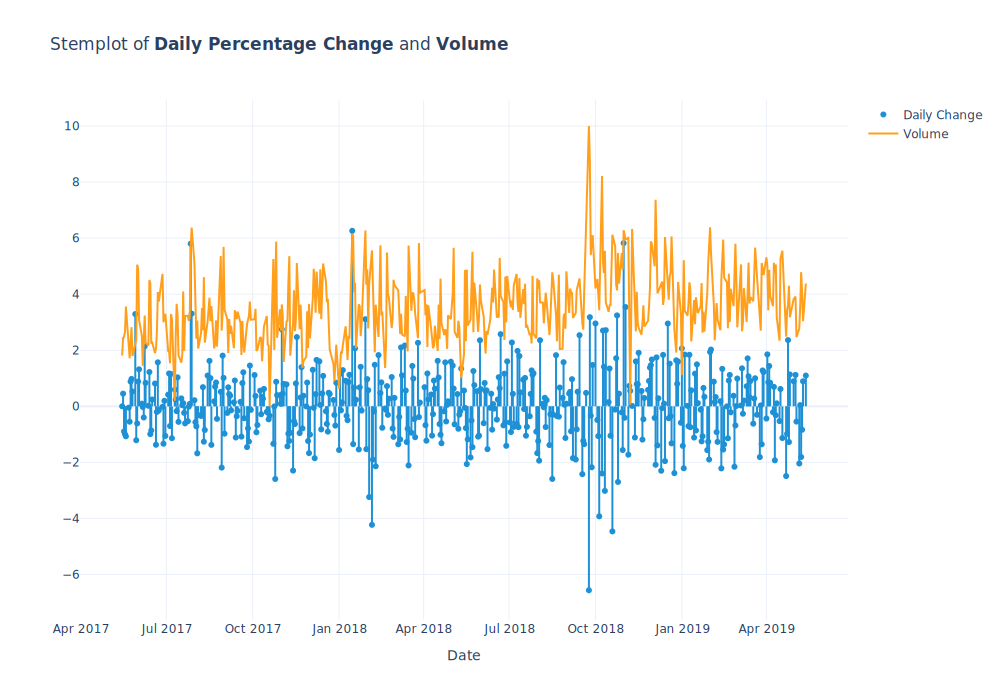

In [8]:
rescaled_daily_volume = (df['No. of Trades'] - min(df['No. of Trades']))/(max(df['No. of Trades']) - min(df['No. of Trades']))
rescaled_daily_volume*= 10
rescaled_daily_change  = df['Day_Perc_Change']
trace_daily_change = dict(x = df.index, 
                   y = rescaled_daily_change, 
                   mode = "markers", 
                   name = 'Daily Change', 
                   marker = dict(color = "#1e91d6"), 
                   error_y = dict(type = "data",
                                  symmetric = False,
                                  arrayminus = rescaled_daily_change,
                                  array = [0] * df['Day_Perc_Change'],
                                  width = 0))
trace_daily_volume = dict(x = df.index, 
                   y = rescaled_daily_volume, 
                   mode = "lines", 
                   name = 'Volume', 
                   marker = dict(color = "#ff9f1c"))
layout = dict(title = 'Stemplot of <b>Daily Percentage Change</b> and <b>Volume</b>', 
              xaxis_title = 'Date', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = [go.Scatter(trace_daily_change), go.Scatter(trace_daily_volume)],
                layout = layout)
fig.show('svg', width = 1000, height = 700)

### Section 4
Proportion of Trends

In [9]:
trends = df.groupby('Trend').count()
trend_pie = dict(labels = trends.index, values = trends['Close Price'])
layout = dict(title = 'Proportion of various trends', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 700, 
              height = 500)
fig = go.Figure(data = go.Pie(trend_pie), layout = layout)
fig.show()

In [10]:
avg_total_quantity_by_trend = df.groupby('Trend').mean()['Total Traded Quantity']
median_total_quantity_by_trend = df.groupby('Trend').median()['Total Traded Quantity']

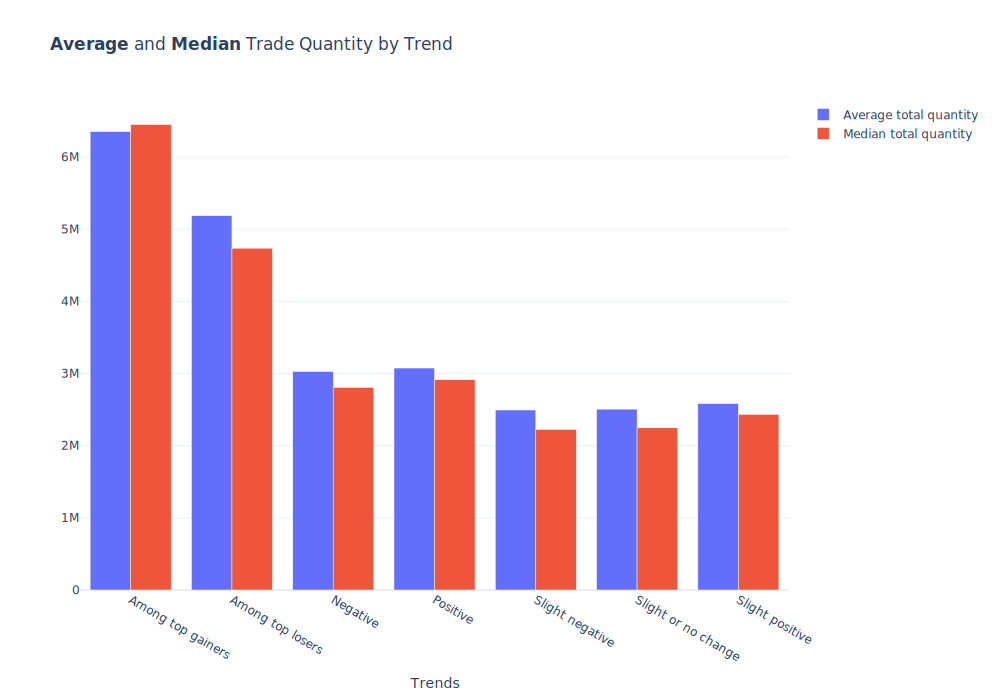

In [11]:
avg_total_quantity_bar = dict(y = avg_total_quantity_by_trend, 
                              x = avg_total_quantity_by_trend.index, 
                              name = "Average total quantity ")
median_total_quantity_bar = dict(y = median_total_quantity_by_trend, 
                                 x = median_total_quantity_by_trend.index,
                                 name = 'Median total quantity')
layout = dict(title = '<b>Average</b> and <b>Median</b> Trade Quantity by Trend', 
              xaxis_title = 'Trends', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = [go.Bar(avg_total_quantity_bar), 
                        go.Bar(median_total_quantity_bar)],
                layout = layout)

fig.show('svg', width = 1000, height = 700)

### Section 5
Histogram Analysis

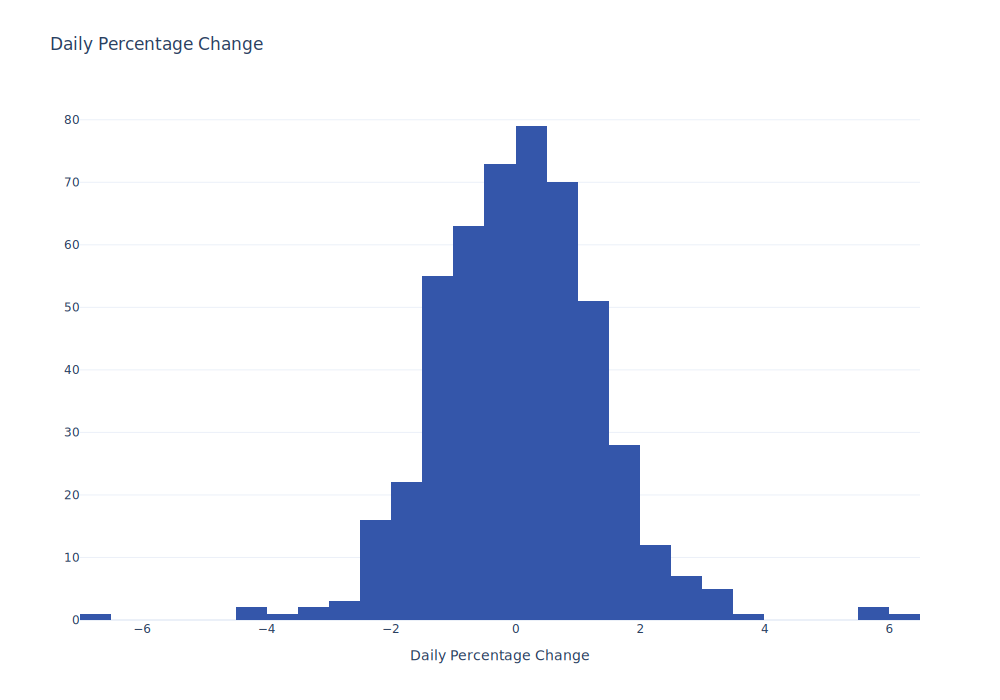

In [12]:

daily_perc = dict(x = df['Day_Perc_Change'], 
                  name = 'Daily Percentage Change',
                  nbinsx = 30,
                  marker = dict(color = '#3456aa'))
layout = dict(title = 'Daily Percentage Change', 
              xaxis_title = 'Daily Percentage Change', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = go.Histogram(daily_perc),
                layout = layout)

fig.show('svg', width = 1000, height = 700)

### Section 6 
Correlation Analysis

In [13]:
import glob
stock_files = glob.glob('./*_Cap/*')
df_2 = []
for filename in np.random.choice(stock_files, 5):
    df_2.append(pd.read_csv(filename))
def change_stock_data(stock):
    stock['Date'] = stock['Date'].astype('datetime64')
    stock.set_index('Date', inplace = True)
    stock = stock[stock['Series'] == 'EQ']
    stock_name = stock['Symbol'].iloc[0]
    stock = stock['Close Price']
    stock = stock.rename(stock_name)
    return stock
df_2 = list(map(change_stock_data, df_2))

In [14]:
from functools import reduce
df_5_stocks = reduce(lambda x, y: pd.merge(x, y, left_index = True, right_index = True), df_2)
df_5_stocks = df_5_stocks.pct_change().dropna()

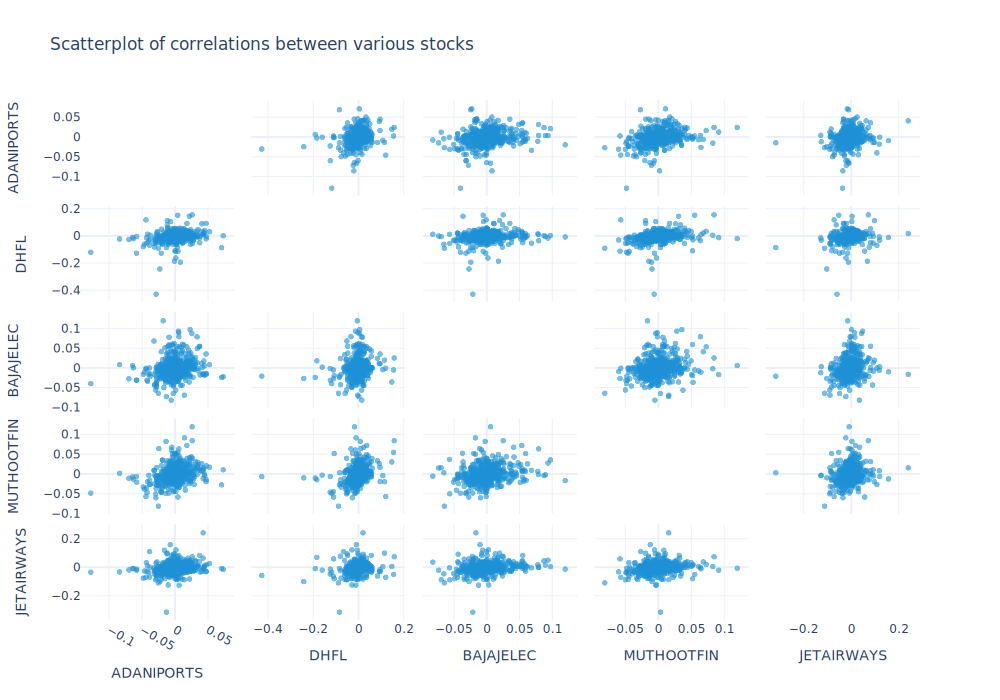

In [15]:
splom = dict(dimensions = [dict(label = label, 
                                values = values) 
                                for label, values 
                                in zip(df_5_stocks.columns, df_5_stocks.values.T)],
             diagonal_visible = False,
             marker = dict(color = '#1e91d6',
                           opacity = 0.6,
                           size = 5))
layout = dict(title = "Scatterplot of correlations between various stocks",
              width = 1300,
              height = 800,
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white')
fig = go.Figure(data = go.Splom(splom), layout = layout)
fig.show('svg', width = 1000, height = 700)

### Section 7
Volatility

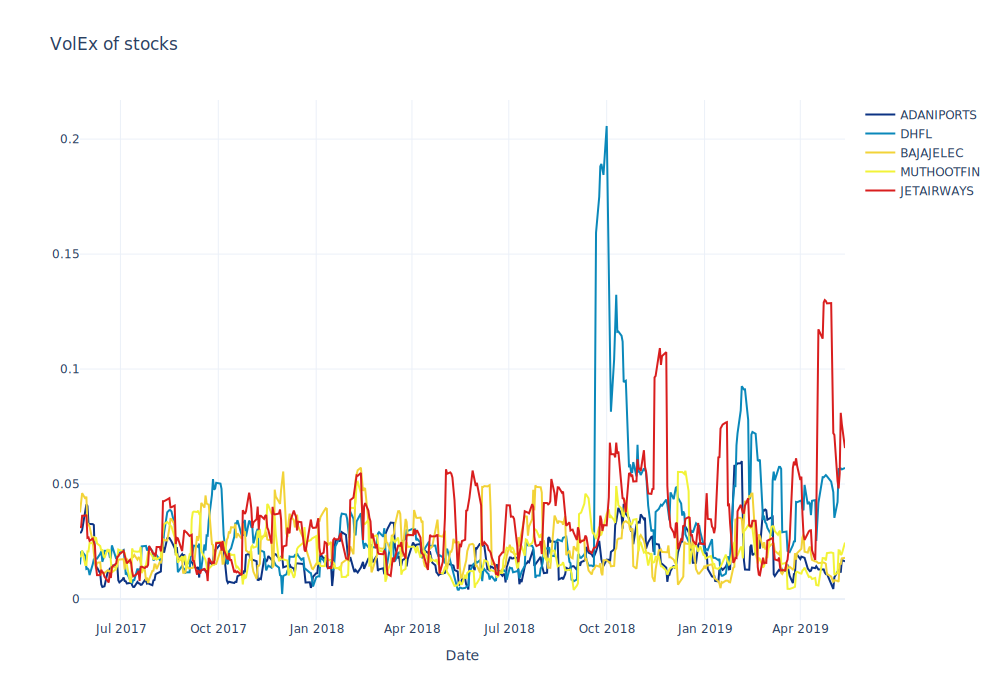

In [16]:
volatilities = df_5_stocks.rolling(7).std().dropna()
snames = volatilities.columns
Portland_colours = ['rgb(12, 51, 131)', 
                    'rgb(10, 136, 186)', 
                    'rgb(242, 211, 56)', 
                    'rgb(242, 243, 56)', 
                    'rgb(217, 30, 30)']
traces = [dict(y = volatilities[sname], 
              x = volatilities.index,
              name = sname,
              mode = "lines", 
              marker = dict(color = color)) for sname, color in zip(snames, Portland_colours) ]

layout = dict(title = 'VolEx of stocks', 
              xaxis_title = 'Date', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = [go.Scatter(trace) for trace in traces],
                layout = layout)
fig.show('svg', width = 1000, height = 700)

### Section 9
SMAs'

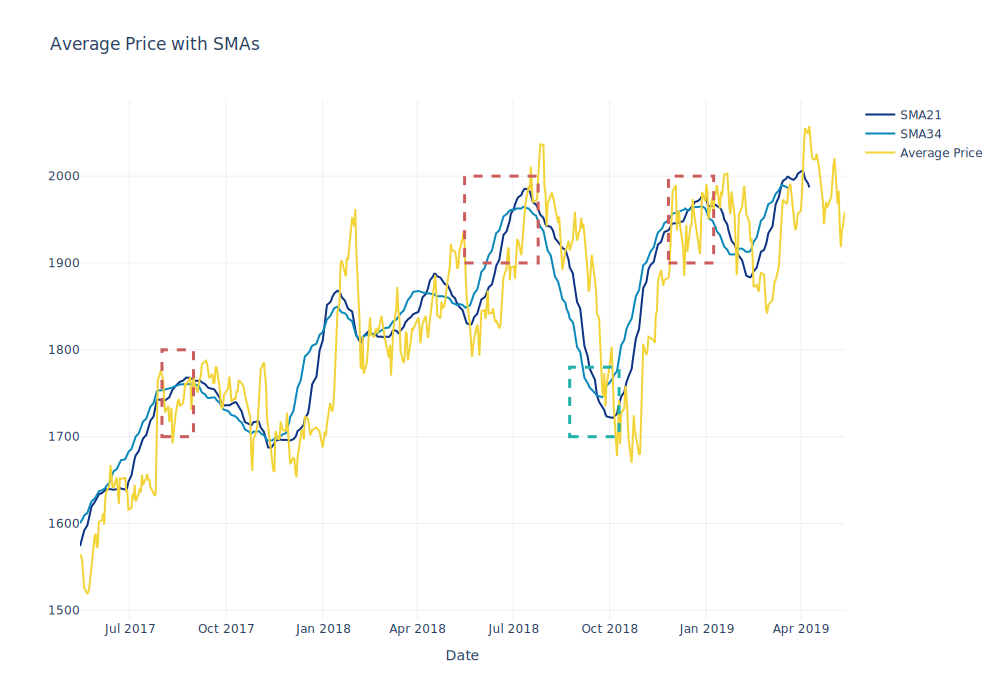

In [17]:
sma_21 = df.rolling(21).mean().dropna()['Average Price'].rename('SMA21')
sma_34 = df.rolling(34).mean().dropna()['Average Price'].rename('SMA34')
avg_price = df['Average Price']
average_traces = [dict(y = sma_name, 
              x = df.index,
              name = str(sma_name.name),
              mode = "lines", 
              marker = dict(color = color)) for sma_name, color in zip([sma_21, sma_34, avg_price], Portland_colours[:3]) ]

layout = dict(title = 'Average Price with SMAs', 
              xaxis_title = 'Date', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = [go.Scatter(trace) for trace in average_traces],
                layout = layout)
fig.add_shape(type = "rect",
            x0 = df.index[320],
            y0 = 1700,
            x1 = df.index[350],
            y1 = 1780,
            line = dict(color="lightseagreen", width = 3, dash = 'dash'))
fig.add_shape(type = "rect",
            x0 = df.index[250],
            y0 = 1900,
            x1 = df.index[300],
            y1 = 2000,
            line = dict(color="indianred", width = 3, dash = 'dash'))
fig.add_shape(type = "rect",
            x0 = df.index[380],
            y0 = 1900,
            x1 = df.index[410],
            y1 = 2000,
            line = dict(color="indianred", width = 3, dash = 'dash'))
fig.add_shape(type = "rect",
            x0 = df.index[55],
            y0 = 1700,
            x1 = df.index[75],
            y1 = 1800,
            line = dict(color="indianred", width = 3, dash = 'dash'))
fig.show('svg', width = 1000, height = 700)

### Section 10
Bollinger Bands

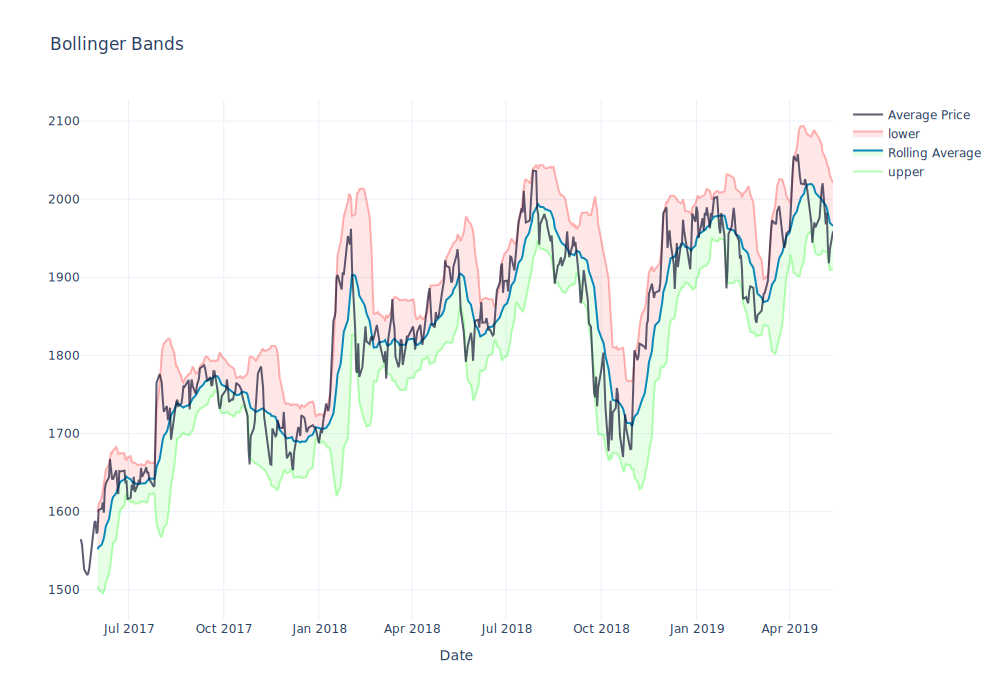

In [18]:
band_colors = ['rgba(12, 250, 12, 0.3)', 
               'rgba(10, 136, 186, 1)', 
               'rgba(250, 12, 12, 0.3)']
fill_colors = ['rgba(10, 136, 186, 1)',
               'rgba(12, 250, 12, 0.1)', 
               'rgba(250, 12, 12, 0.1)']
boll_upper = (df.rolling(14).mean() - (2 * df.rolling(14).std()))['Average Price'].rename('upper')
boll_lower = (df.rolling(14).mean() + (2 * df.rolling(14).std()))['Average Price'].rename('lower')
avg_price_21 = df['Average Price'].rolling(14).mean().rename('Rolling Average')
average_traces = [dict(y = sma_name, 
              x = df.index,
              name = str(sma_name.name),
              fill = fill,
              fillcolor = fill_color,
              mode = "lines", 
              line = dict(color = color)) 
                            for sma_name, color, fill, fill_color 
                            in zip([boll_upper, avg_price_21, boll_lower], 
                                    band_colors,
                                    [None, 'tonexty', 'tonexty'],
                                    fill_colors)]
average_price = dict(x = df.index, 
                   y = df['Average Price'], 
                   mode = "lines", 
                   name = 'Average Price', 
                   marker = dict(color = 'rgba(24, 24, 56, 0.7)'))
average_traces.append(average_price)
layout = dict(title = 'Bollinger Bands', 
              xaxis_title = 'Date', 
              autosize = False, 
              template = "plotly_dark" if THEME.lower() == 'dark' else 'plotly_white',
              width = 1300, 
              height = 700)
fig = go.Figure(data = [go.Scatter(trace) for trace in average_traces],
                layout = layout)
fig.show('svg', width = 1000, height = 700)

In [19]:
df['Boll_lower'] = (df.rolling(14).mean() - (2 * df.rolling(14).std()))['Average Price']
df['Boll_middle'] = df['Average Price'].rolling(14).mean()
df['Boll_upper'] = (df.rolling(14).mean() + (2 * df.rolling(14).std()))['Average Price']

In [20]:
df.drop(df.columns[0], axis = 1).to_csv('HDFC_with_Boll.csv')